Just copied the readme.md here


# Alithea Genomics: Your Gateway to Expert BRB-seq Data Processing

## Thank You for Choosing Our Service!

We appreciate your trust in our BRB-seq data processing service. Your sequencing data has been expertly processed, and the results are now ready for your analysis. Below is an overview of the output files gfrom the pre-processing data analysis.

## Pre-processing Steps

1. **Read Alignment & Demultiplexing**:
   - Your raw sequencing reads have been aligned to the reference genome and demultiplexed using STARsolo.

2. **Quality Control (QC)**:
   - The quality of the sequencing data has been assessed using FastQC, and a comprehensive report has been generated to summarize the quality metrics and read distribution.

3. **UMI Deduplication & Count Matrix Generation**:
   - Unique molecular identifiers (UMIs) were used to deduplicate reads, creating both deduplicated and non-deduplicated count matrices.

## Output Files and Folders

Your processed data is organized into the following output directories:

### 1. Read counts:

#### 1.1. **counts.read.zip**:
   - A zip archive containing deduplicated and non-deduplicated count matrices for your data.
   - **Files**:
    - `[FASTQ_NAME].read.counts.wells.detailed.txt`: Non-deduplicated read counts across all wells in a plate, including both pooled and non-pooled samples, with well IDs used for header. Includes details about alignment per sample.
    - `[FASTQ_NAME].read.counts.txt`: Non-deduplicated read counts across all wells in a plate, including both pooled and non-pooled samples, with well IDs used for header.
    - `[FASTQ_NAME].read.counts.wells.txt`: Non-deduplicated read counts across pooled samples mentioned in the sample submission form (SSF), with well IDs used for header.
    - `[FASTQ_NAME].read.counts.sampleIds.detailed.txt`: Non-deduplicated read counts across pooled samples mentioned in the sample submission form (SSF), with sample IDs used for header. Includes details about alignment per sample.
    - `[FASTQ_NAME].read.counts.sampleIds.txt`: Non-deduplicated read counts across pooled samples mentioned in the sample submission form (SSF), with sample IDs used for header.

#### 1.2. **counts.umi.zip**:
   - A zip archive containing deduplicated and non-deduplicated count matrices for your data.
   - **Files**:
    - `[FASTQ_NAME]_matrix.umi.counts.txt`: Deduplicated UMI counts across all wells in a plate, including both pooled and non-pooled samples, with well IDs used for header.
    - `[FASTQ_NAME].umi.counts.sampleIds.txt`: Deduplicated UMI counts across pooled samples mentioned in the sample submission form (SSF), with sample IDs used for header.
    - `[FASTQ_NAME].umi.counts.wells.txt`: Deduplicated UMI counts across pooled samples mentioned in the sample submission form (SSF), with well IDs used for header.

#### 1.3. **counts.read.norm.zip**:
   - A zip archive containing deduplicated and non-deduplicated count matrices for your data.
   - **Files**:
    - `[FASTQ_NAME].read.counts.norm.txt`: Non-deduplicated read counts across all wells in a plate, including both pooled and non-pooled samples, with well IDs used for header.
    - `[FASTQ_NAME].read.counts.wells.norm.txt`: Non-deduplicated read counts across pooled samples mentioned in the sample submission form (SSF), with well IDs used for header.
    - `[FASTQ_NAME].read.counts.sampleIds.norm.txt`: Non-deduplicated read counts across pooled samples mentioned in the sample submission form (SSF), with sample IDs used for header.

#### 1.4. **counts.umi.norm.zip**:
   - A zip archive containing deduplicated and non-deduplicated count matrices for your data.
   - **Files**:
    - `[FASTQ_NAME]_matrix.umi.counts.norm.txt`: Deduplicated UMI counts across all wells in a plate, including both pooled and non-pooled samples, with well IDs used for header.
    - `[FASTQ_NAME].umi.counts.sampleIds.norm.txt`: Deduplicated UMI counts across pooled samples mentioned in the sample submission form (SSF), with sample IDs used for header.
    - `[FASTQ_NAME].umi.counts.wells.norm.txt`: Deduplicated UMI counts across pooled samples mentioned in the sample submission form (SSF), with well IDs used for header.

### 2. **bigwigs/**:
   - Contains BigWig files for visualizing genome-wide read coverage.

### 3. **fastqc/**:
   - Includes FastQC reports that summarize the quality of the raw sequencing reads.
   - **Files**:

### 4. **qc/**:
   - Contains quality control reports and statistics for your sequencing data.
   - **Files**:
     - `[FASTQ_NAME]_matrix.alignment.by.sample.txt`: Per-sample meta-information and quality control statistics.
     - `distribution.merged.txt`: RSeQC read distribution analysis output.
     - `summary.sequencing.txt`: Summary file containing alignment statistics generated by custom scripts.
     - `Summary.Alignment.txt`: Summary file containing alignment statistics generated by STARsolo.

### 5. **reports/**:
   - Contains detailed reports on sequencing and alignment statistics, as well as sample-wise statistics for every plate.
   - **Files**:

### 6. **md5sums.txt**:
   - Contains MD5 checksums for all generated files to ensure data integrity.
   - **File**: `md5sums.txt`

---

Thank you once again for using our service! If you have any questions or need further assistance with your data, please don't hesitate to reach out to us.

In [1]:
experiment_of_interest = "AMP0366"
raw_counts = "counts"
norm_counts = "counts.norm"
deduplicated = "umi"
non_deduplicated = "read"
wells_pooled = ".counts.txt"
wells_pooled_norm = ".counts.norm.txt"

In [ ]:
import pandas as pd
import numpy as np
import os
from glob import glob

os.system(". /home/ubuntu/batch2_alithea/s3fs.sh")
os.chdir("/home/ubuntu/batch2_alithea/s3_mount/Experiments/20250305_MoA1058_second_batch_coupled_cellpainting_AlitheaFullService")

modprobe: ERROR: could not insert 'fuse': Operation not permitted
mkdir: cannot create directory ‘s3_mount’: File exists


In [ ]:
f"{norm_counts}/*.{non_deduplicated}{wells_pooled_norm}"
amp0314 = f"/home/ubuntu/batch2_alithea/s3_mount/Experiments/20250305_MoA1058_second_batch_coupled_cellpainting_AlitheaFullService/Reads/AMP0366/"

In [6]:
raw_counts_no_dedup = list(glob(f"*/{raw_counts}/*.{non_deduplicated}{wells_pooled}"))
raw_counts_dedup = list(glob(f"*/{raw_counts}/*.{deduplicated}{wells_pooled}"))
norm_counts_no_dedup = list(glob(f"*/{norm_counts}/*.{non_deduplicated}{wells_pooled_norm}"))
norm_counts_dedup = list(glob(f"*/{norm_counts}/*.{deduplicated}{wells_pooled_norm}"))

dup_dedup_list = list(zip(raw_counts_no_dedup, raw_counts_dedup))
dup_dedup_list_norm = list(zip(norm_counts_no_dedup, norm_counts_dedup))

In [ ]:
# meta_data = "lyon_moa_clustering.xlsx"
# meta_data = pd.read_excel(meta_data, sheet_name = "Feuil1")

In [ ]:
# meta_data.rename(columns = {
#     "Plate #": "Metadata_plate",
#     "Well": "Metadata_row",
#     "Unnamed: 3": "Metadata_col",
#     "Pathway / Target": "Metadata_MOA",
#     "Fraction nb": "Metadata_fraction_nb",
#     "BCS-code": "Metadata_treatments",
#     "MIC (µM)": "Metadata_concentration",
# }, inplace = True)
# meta_data.drop(columns = ["Unnamed: 0"], inplace = True)
# meta_data.loc[meta_data["Metadata_MOA"] == "DMSO", "Metadata_concentration"] = 1
# meta_data.loc[meta_data["Metadata_MOA"] == "DMSO", "Metadata_treatments"] = "DMSO"
# meta_data.loc[meta_data["Metadata_MOA"] == "DMSO", "Metadata_fraction_nb"] = "DMSO"

In [9]:
meta_data["Metadata_Wells"] = meta_data["Metadata_row"] + meta_data["Metadata_col"].astype(str).str.zfill(2)

In [10]:
meta_data.to_csv("lyon_moa_clustering_clean.csv", index = False)
meta_data.head()

Metadata_plate Metadata_row  Metadata_col    Metadata_MOA  \
0          SYS#1            A             1            DMSO   
1          SYS#1            B             1  cell wal - CHS   
2          SYS#1            C             1  cell wal - CHS   
3          SYS#1            D             1  cell wal - CHS   
4          SYS#1            E             1  cell wal - CHS   

  Metadata_fraction_nb Metadata_treatments  Metadata_concentration  \
0                 DMSO                DMSO                1.000000   
1          KBR9646-1-2         BCS-AR58000                0.411523   
2          LMAE827-1-2         BCS-DH85598                3.703704   
3         LCNA2634-1-4         BCS-DH85602                0.411523   
4         LCNA2646-2-3         BCS-DH88447                3.703704   

  Metadata_Wells  
0            A01  
1            B01  
2            C01  
3            D01  
4            E01

In [11]:
meta_data["Metadata_plate"].unique()

array(['SYS#1', 'SYS#2', 'SYS#3', 'SYS#4'], dtype=object)

In [12]:
plate_info = pd.read_excel(f"{experiment_of_interest}/sample_info_minimal_SIT.xlsx", sheet_name = "Sheet1")

In [13]:
plate_info.head()

sampleID barcode  RT_RNA_amount_ng     LibraryName  \
0  SYS#4_A1_rep1     A01               NaN  L111224TS12_01   
1  SYS#4_A2_rep1     A02               NaN  L111224TS12_01   
2  SYS#4_A3_rep1     A03               NaN  L111224TS12_01   
3  SYS#4_A4_rep1     A04               NaN  L111224TS12_01   
4  SYS#4_A5_rep1     A05               NaN  L111224TS12_01   

          unique_rowID projectID  plateID plateRow  plateCol  \
0  L111224TS12_01__A01   AMP0313  plate12        A         1   
1  L111224TS12_01__A02   AMP0313  plate12        A         2   
2  L111224TS12_01__A03   AMP0313  plate12        A         3   
3  L111224TS12_01__A04   AMP0313  plate12        A         4   
4  L111224TS12_01__A05   AMP0313  plate12        A         5   

           organism  ...  a260.230 RIN...19  dilution_Water_vol  \
0  Botrytis_cinerea  ...       NaN      NaN                 NaN   
1  Botrytis_cinerea  ...      1.65      NaN                 NaN   
2  Botrytis_cinerea  ...       NaN      NaN                 NaN   
3  Botrytis_cinerea  ...       NaN      NaN                 NaN   
4  Botrytis_cinerea  ...       NaN      NaN                 NaN   

   RT_RNA_volume cDNA_volume_pooled  barcode_version  protocol_version  \
0            NaN                NaN        96_V5_P08               NaN   
1            NaN                NaN        96_V5_P08               NaN   
2            NaN                NaN        96_V5_P08               NaN   
3            NaN                NaN        96_V5_P08               NaN   
4            NaN                NaN        96_V5_P08               NaN   

                                RunID Expected.mio.reads  sampleID_barcode  
0  AVI126-127-128-129-130-131-132-133                  5  SYS#4_A1_rep1A01  
1  AVI126-127-128-129-130-131-132-133                  5  SYS#4_A2_rep1A02  
2  AVI126-127-128-129-130-131-132-133                  5  SYS#4_A3_rep1A03  
3  AVI126-127-128-129-130-131-132-133                  5  SYS#4_A4_rep1A04  
4  AVI126-127-128-129-130-131-132-133                  5  SYS#4_A5_rep1A05  

[5 rows x 31 columns]

In [41]:
plate_info["sampleID"].unique()

array(['SYS#4', 'SYS#1', 'SYS#2'], dtype=object)

In [14]:
plate_info["sampleID"] = [ x.split("_")[0] for x in plate_info["sampleID"]]

In [15]:
plate_dict = dict(zip(plate_info["LibraryName"], plate_info["sampleID"]))

In [16]:
plate_dict

{'L111224TS12_01': 'SYS#4',
 'L111224TS10_01': 'SYS#1',
 'L111224TS13_01': 'SYS#4',
 'L111224TS04_01': 'SYS#1',
 'L111224TS16_01': 'SYS#4',
 'L111224TS08_01': 'SYS#1',
 'L111224TS06_01': 'SYS#2',
 'L111224TS01_01': 'SYS#2',
 'L111224TS14_01': 'SYS#4',
 'L111224TS02_01': 'SYS#2',
 'L111224TS09_01': 'SYS#2',
 'L111224TS03_01': 'SYS#1',
 'L111224TS05_01': 'SYS#2',
 'L111224TS15_01': 'SYS#4',
 'L111224TS07_01': 'SYS#1'}

In [20]:

import pandas as pd

def load_and_melt_data(file_path):
    """Load data from a file and convert to long format."""
    df = pd.read_table(file_path, index_col=0).T.rename(columns={"Gene_id": "Metadata_well"})
    return df

def create_long_format(df, value_name):
    """Convert DataFrame to long format with Metadata_Wells."""
    df["index"] = df.index
    long_df = df.reset_index().melt(id_vars='index', var_name='Column', value_name=value_name)
    long_df['Metadata_Wells'] = long_df['index'] + long_df['Column'].astype(str).str.zfill(2)
    return long_df.drop(columns=['index', 'Column'])

def check_deduplication(input_tuple):
    no_dedup_path, dedup_path = input_tuple
    fasta_library = no_dedup_path.split("/")[-1].split(".")[0]
    plate_number = plate_dict[fasta_library]
    print(fasta_library)
    print(plate_number)
    # Load and process data
    df_dedup = load_and_melt_data(dedup_path)
    df_no_dedup = load_and_melt_data(no_dedup_path)
    
    # Calculate counts
    counts_per_well_dedup = df_dedup.sum(axis=1)
    counts_per_well_no_dedup = df_no_dedup.sum(axis=1)
    total_count_no_dedup = df_no_dedup.sum().sum()
    total_count_dedup = df_dedup.sum().sum()
    
    # Calculate deduplication ratio
    deduplication_ratio = total_count_dedup / total_count_no_dedup if total_count_no_dedup > 0 else 0
    
    df_dedup["Metadata_Wells"] = df_dedup.index
    
    meta_data_right_plate = meta_data[meta_data["Metadata_plate"] == plate_number].copy()
    df_dedup = df_dedup.merge(meta_data_right_plate, on="Metadata_Wells", how="left")
    
    # Add Metadata_plate
    df_dedup["Metadata_plate"] = fasta_library
    df_dedup["Metadata_treatment_sheet"] = plate_number

    # Prepare info bundle
    info_bundle = (fasta_library, counts_per_well_dedup, counts_per_well_no_dedup, 
                   total_count_no_dedup, total_count_dedup, deduplication_ratio)
    
    return df_dedup, info_bundle

In [18]:
# for table in dup_dedup_list:
#     df_dedup, info_bundle = check_deduplication(table)
#     break

In [21]:
output_list = list(map(check_deduplication, dup_dedup_list))
output_list_norm = list(map(check_deduplication, dup_dedup_list_norm))

L111224TS01_01
SYS#2
L111224TS02_01
SYS#2
L111224TS03_01
SYS#1
L111224TS04_01
SYS#1
L111224TS05_01
SYS#2
L111224TS06_01
SYS#2
L111224TS07_01
SYS#1
L111224TS08_01
SYS#1
L111224TS09_01
SYS#2
L111224TS10_01
SYS#1
L111224TS12_01
SYS#4
L111224TS13_01
SYS#4
L111224TS14_01
SYS#4
L111224TS15_01
SYS#4
L111224TS16_01
SYS#4
L111224TS01_01
SYS#2
L111224TS02_01
SYS#2
L111224TS03_01
SYS#1
L111224TS04_01
SYS#1
L111224TS05_01
SYS#2
L111224TS06_01
SYS#2
L111224TS07_01
SYS#1
L111224TS08_01
SYS#1
L111224TS09_01
SYS#2
L111224TS10_01
SYS#1
L111224TS12_01
SYS#4
L111224TS13_01
SYS#4
L111224TS14_01
SYS#4
L111224TS15_01
SYS#4
L111224TS16_01
SYS#4


In [22]:
list_count_tables_raw, information_bundles = zip(*output_list)
list_count_tables_norm, information_bundles_norm = zip(*output_list_norm)

fasta_library, counts_per_well_dedup, counts_per_well_no_dedup, total_count_no_dedup, total_count_dedup, deduplication_ratio = zip(*information_bundles)

In [23]:
big_df_raw = pd.concat(list_count_tables_raw)
big_df_norm = pd.concat(list_count_tables_norm)

In [40]:
big_df_raw["Metadata_treatment_sheet"].unique()

array(['SYS#2', 'SYS#1', 'SYS#4'], dtype=object)

In [24]:
big_df_raw[big_df_raw["Metadata_treatments"] == "BCS-AA15826"]

Bcin01g00010  Bcin01g00020  Bcin01g00030  Bcin01g00040  Bcin01g00050  \
87             3             0             8             4             7   
87             4             1             5             2             6   
87             2             3            11             3             5   
87             3             1            24             6             8   
87             2             1             8             0             6   

    Bcin01g00060  Bcin01g00070  Bcin01g00080  Bcin01g00090  Bcin01g00100  ...  \
87            14            53            41             3             0  ...   
87             9            43            25             6             0  ...   
87             6            86            60             2             1  ...   
87             9            65            61             9             3  ...   
87             7            43            20             6             1  ...   

    nbis-gene-2  Metadata_Wells  Metadata_plate  Metadata_row  Metadata_col  \
87            0             H04  L111224TS01_01             H           4.0   
87            0             H04  L111224TS02_01             H           4.0   
87            0             H04  L111224TS05_01             H           4.0   
87            0             H04  L111224TS06_01             H           4.0   
87            0             H04  L111224TS09_01             H           4.0   

                   Metadata_MOA  Metadata_fraction_nb  Metadata_treatments  \
87  lipid SBI - C14 demethylase           WOIT123-1-1          BCS-AA15826   
87  lipid SBI - C14 demethylase           WOIT123-1-1          BCS-AA15826   
87  lipid SBI - C14 demethylase           WOIT123-1-1          BCS-AA15826   
87  lipid SBI - C14 demethylase           WOIT123-1-1          BCS-AA15826   
87  lipid SBI - C14 demethylase           WOIT123-1-1          BCS-AA15826   

    Metadata_concentration  Metadata_treatment_sheet  
87                1.234568                     SYS#2  
87                1.234568                     SYS#2  
87                1.234568                     SYS#2  
87                1.234568                     SYS#2  
87                1.234568                     SYS#2  

[5 rows x 12203 columns]

In [25]:
# # Assuming big_df_raw is your DataFrame
# # Step 1: Calculate proportions of Metadata_concentration and Metadata_timepoint excluding DMSO
# non_dmso_df = big_df_raw[big_df_raw['Metadata_treatments'] != 'DMSO']

# # Calculate proportions for concentration
# concentration_counts = non_dmso_df['Metadata_concentration'].value_counts(normalize=True)
# # Calculate proportions for timepoint
# timepoint_counts = non_dmso_df['Metadata_timepoint'].value_counts(normalize=True)

# # Step 2: Apply the proportions to DMSO rows
# dmso_rows = big_df_raw['Metadata_treatments'] == 'DMSO'

# # Replace Metadata_concentration and Metadata_timepoint based on proportions
# big_df_raw.loc[dmso_rows, 'Metadata_concentration'] = \
#     np.random.choice(concentration_counts.index, size=dmso_rows.sum(), p=concentration_counts.values)

# big_df_raw.loc[dmso_rows, 'Metadata_timepoint'] = \
#     np.random.choice(timepoint_counts.index, size=dmso_rows.sum(), p=timepoint_counts.values)


In [26]:
big_df_raw.to_csv("full_raw_matrix_and_meta.csv")
big_df_norm.to_csv("full_norm_matrix_and_meta.csv")

In [27]:
big_df_raw[["Metadata_treatments", "Metadata_MOA"]].to_csv("treatment2moa.csv")

In [28]:
df_deduplication = pd.DataFrame({
    "Fasta_library": fasta_library,
    "Total read count after deduplication": total_count_dedup,
    "Total read count before deduplication": total_count_no_dedup,
    "Fraction of Reads left after deduplication": deduplication_ratio}
)

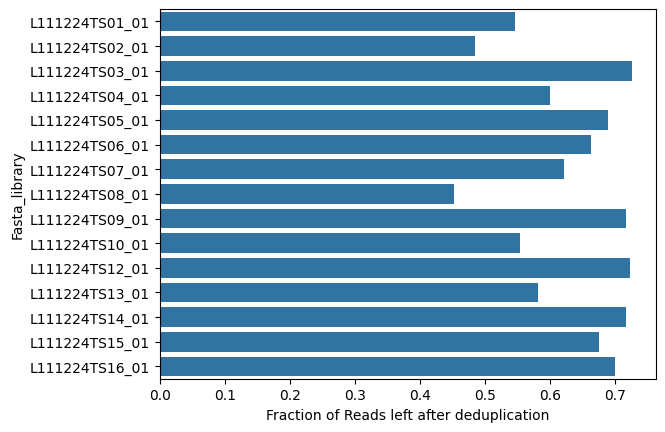

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(y = "Fasta_library", x = "Fraction of Reads left after deduplication", data = df_deduplication)
plt.show()
#plt.close()

/home/ec2-user/miniconda3/envs/bridge_env/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/ec2-user/miniconda3/envs/bridge_env/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


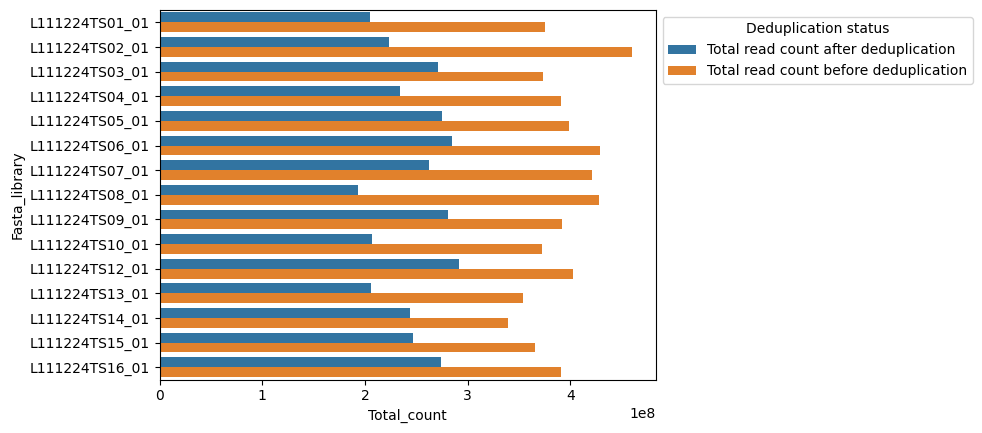

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

df_barplot_dedup = df_deduplication.melt(id_vars = "Fasta_library", value_vars = ["Total read count after deduplication", "Total read count before deduplication"], var_name = "Deduplication_status", value_name = "Total_count")
df_barplot_dedup.head()
ax = sns.barplot(data = df_barplot_dedup, y = "Fasta_library", x = "Total_count", hue = "Deduplication_status")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1), title = "Deduplication status")
plt.show()

/home/ec2-user/miniconda3/envs/bridge_env/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/ec2-user/miniconda3/envs/bridge_env/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


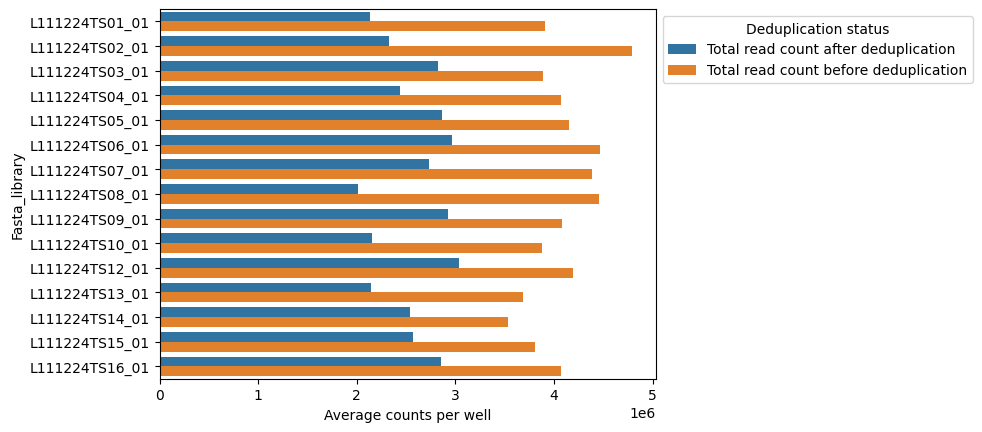

In [31]:
df_barplot_dedup.head()
df_barplot_dedup["Average counts per well"] = df_barplot_dedup["Total_count"] / 96
ax = sns.barplot(data = df_barplot_dedup, y = "Fasta_library", x = "Average counts per well", hue = "Deduplication_status")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1), title = "Deduplication status")
plt.show()

In [32]:
df_list = []
df_list_heatmap = {}

for name, counts in zip(fasta_library, counts_per_well_dedup):
    df = pd.DataFrame(counts)
    df_list_heatmap[name + " total counts"] = counts
    df["Metadata_plate"] = name
    df_list.append(df)
df_per_well_dedup = pd.concat(df_list)
df_heatmap = pd.DataFrame(df_list_heatmap)


In [33]:
df_per_well_dedup.head()
df_per_well_dedup["Well"] = df_per_well_dedup.index
df_per_well_dedup["Total_count"] = df_per_well_dedup[0]

<Axes: >

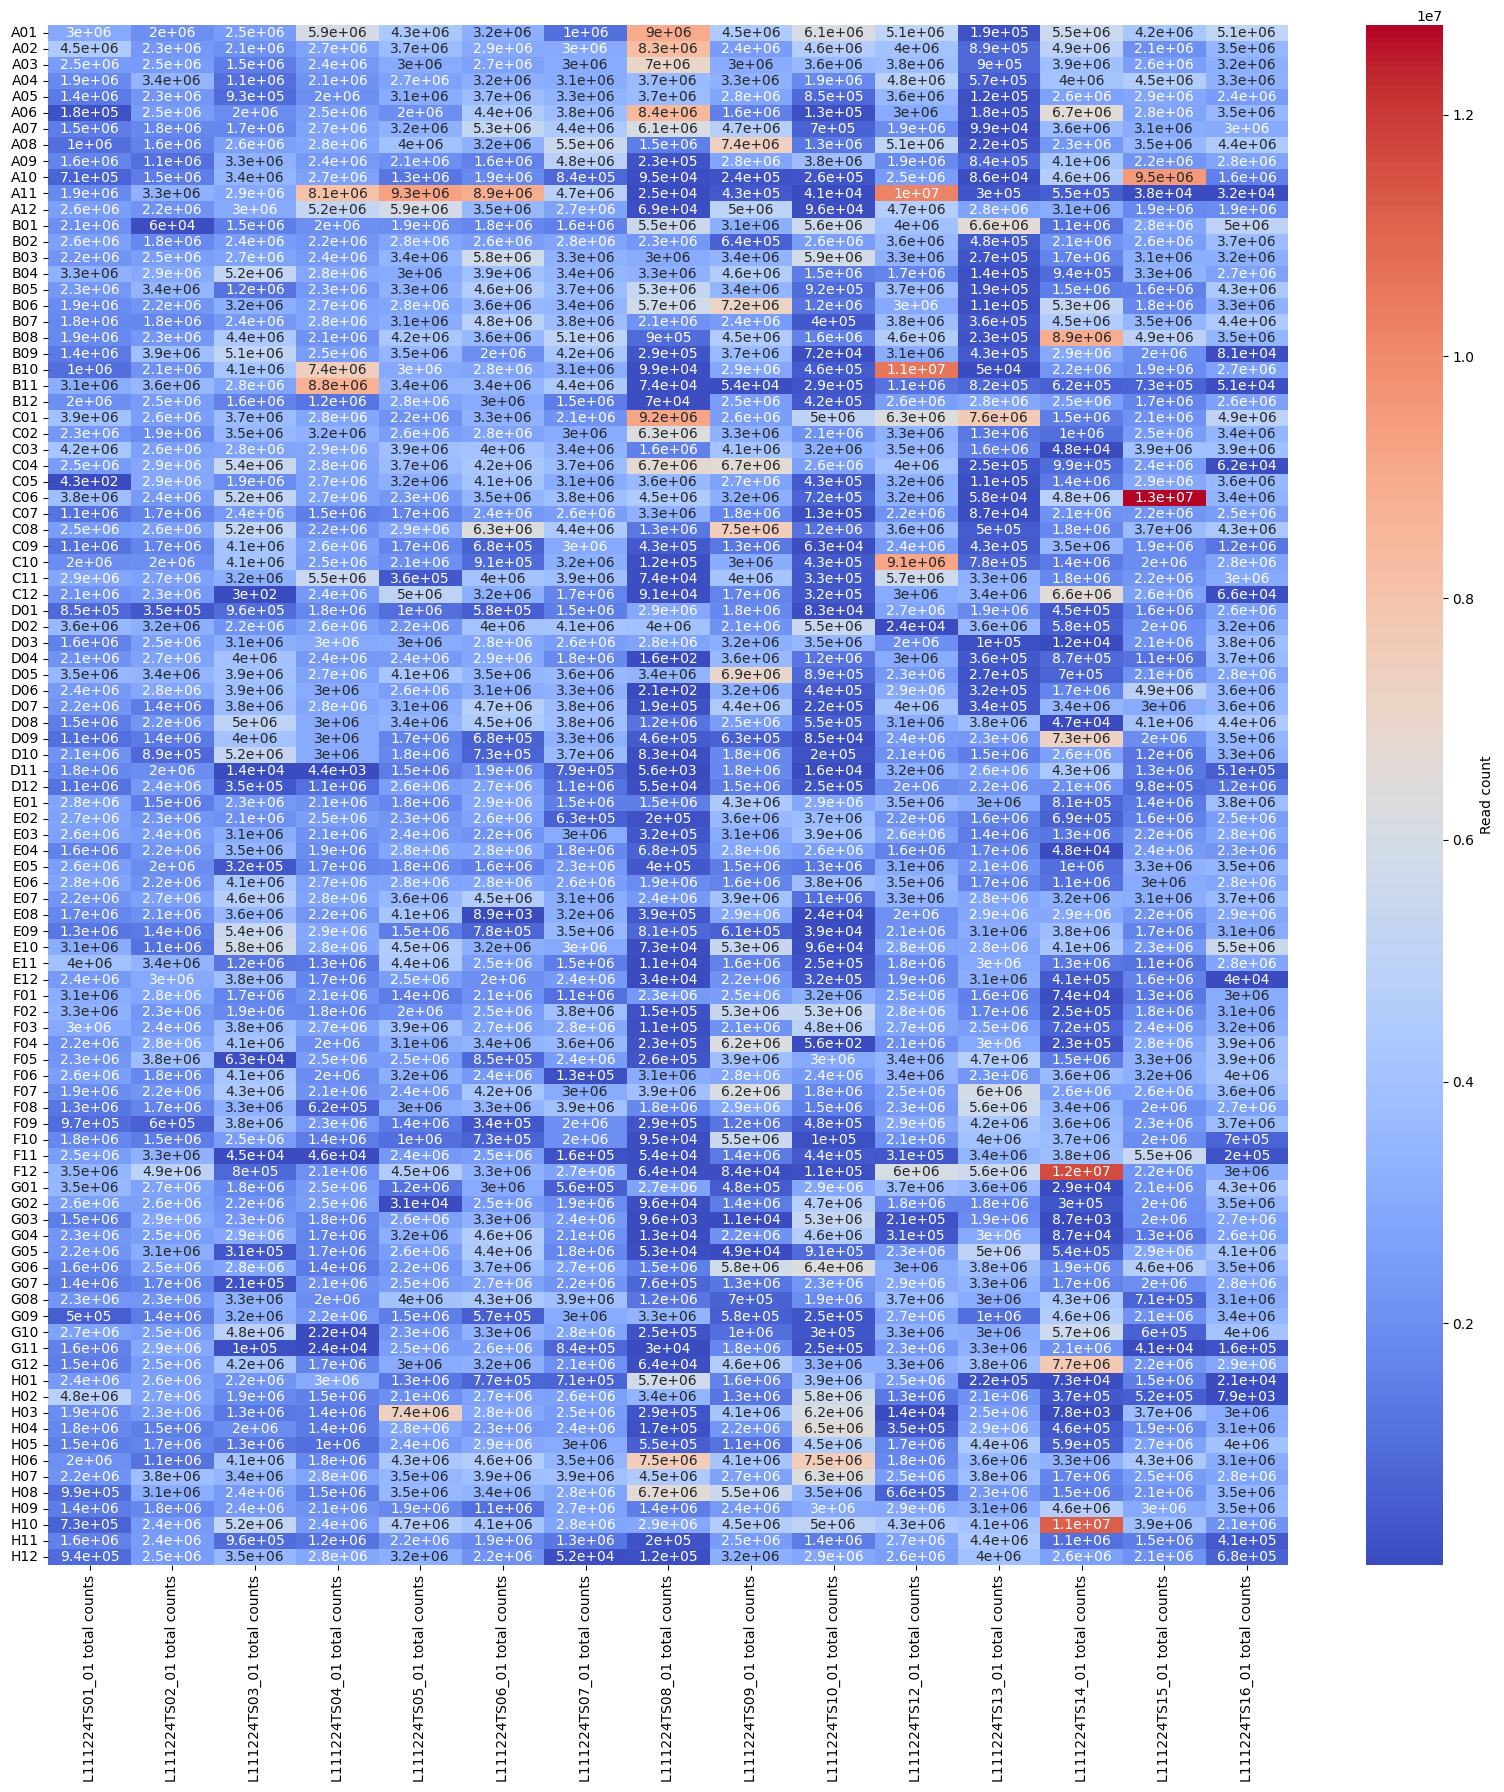

In [34]:
plt.figure(figsize = (20, 20))
sns.heatmap(df_heatmap, cmap = "coolwarm", cbar_kws = {"label": "Read count"}, annot = True)

/home/ec2-user/miniconda3/envs/bridge_env/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Total_count', ylabel='Well'>

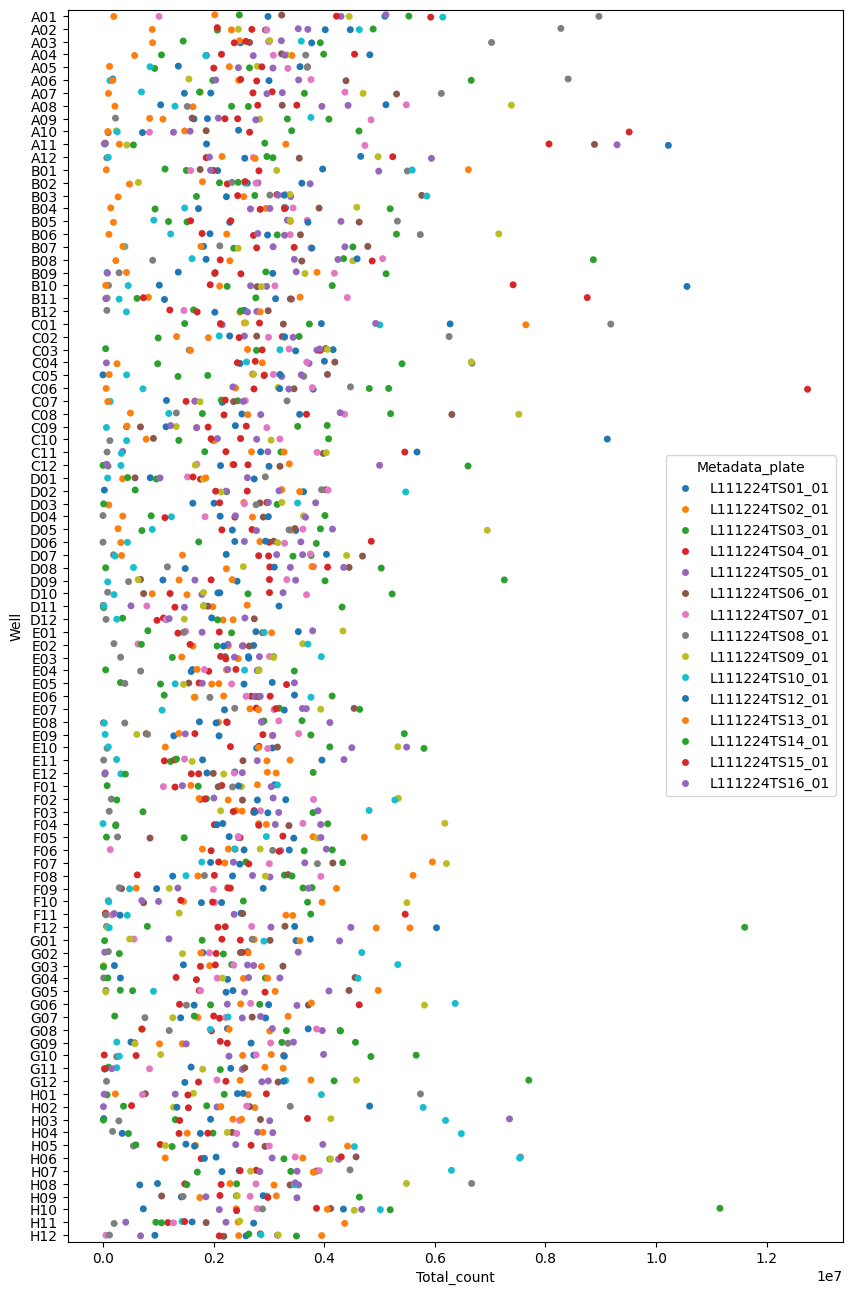

In [35]:
plt.figure(figsize = (10, 16))

sns.stripplot(
    y = "Well",
    x = "Total_count",
    data = df_per_well_dedup,
    hue = "Metadata_plate",
    palette = "tab10"
)

/tmp/ipykernel_23102/1491383018.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/home/ec2-user/miniconda3/envs/bridge_env/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/ec2-user/miniconda3/envs/bridge_env/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/ec2-user/miniconda3/envs/bridge_env/lib/python3.11/site-packages/seaborn/_base.py:94

<Axes: xlabel='Total_count', ylabel='Metadata_plate'>

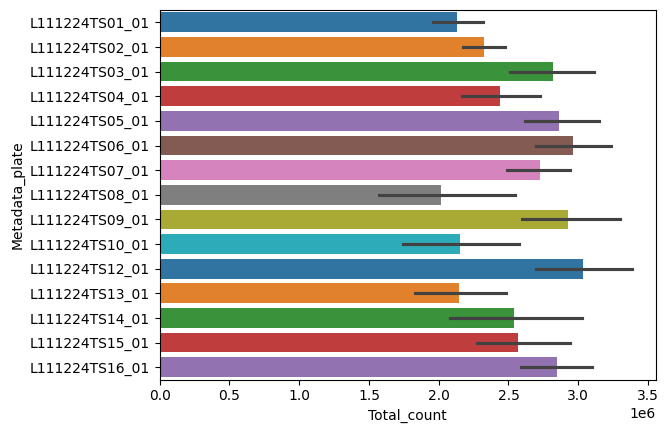

In [36]:
sns.barplot(
    y = "Metadata_plate",
    x = "Total_count",
    data = df_per_well_dedup,
    #hue = "",
    palette = "tab10"
)

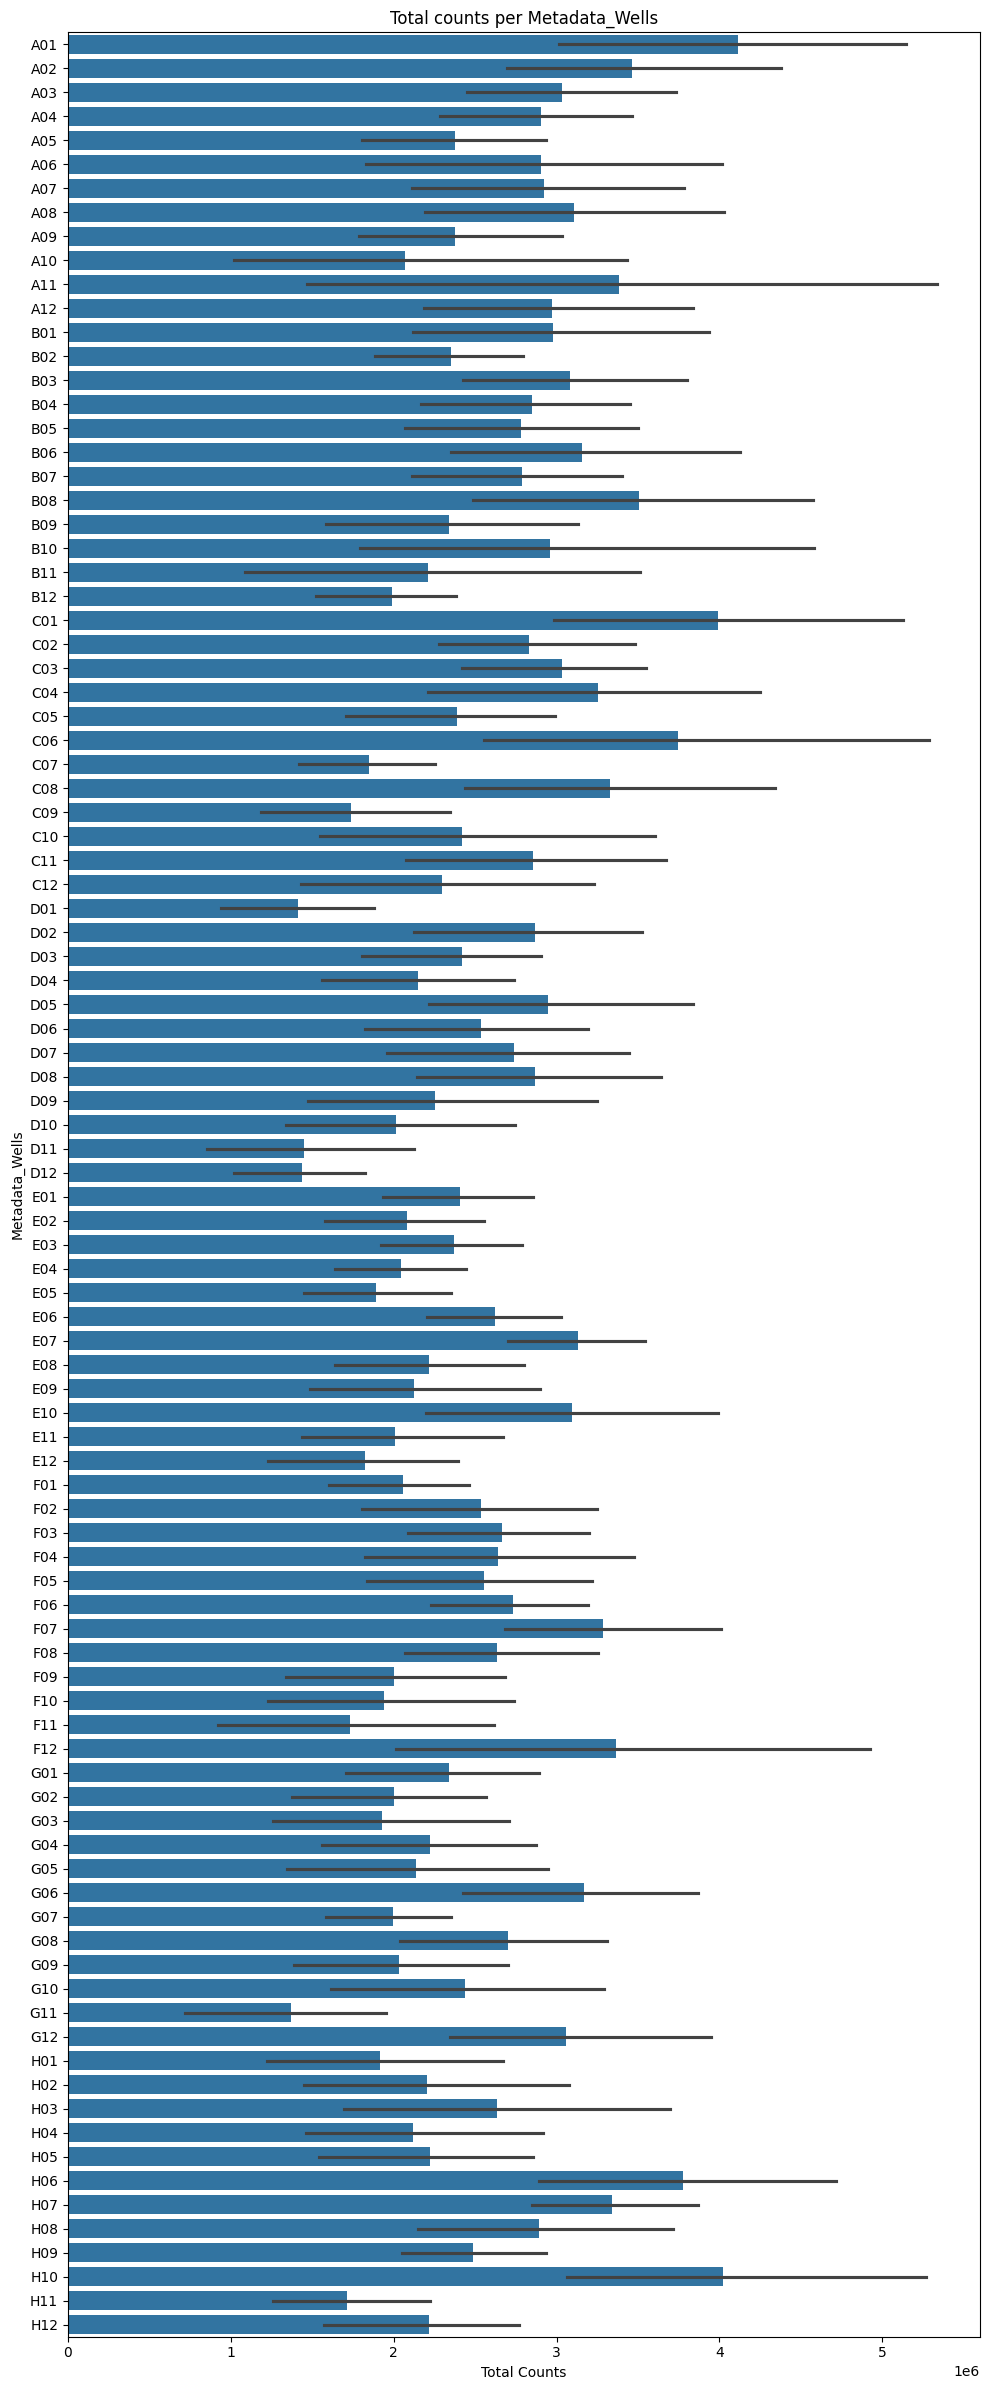

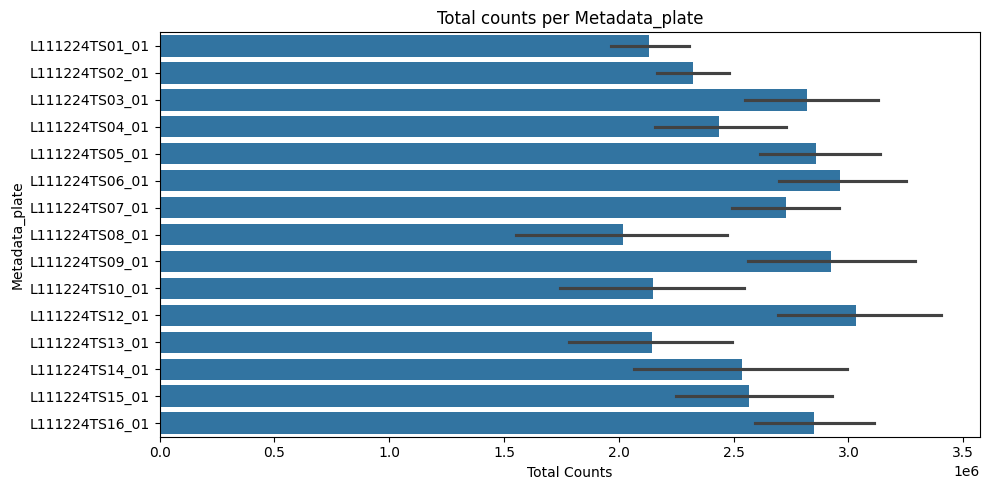

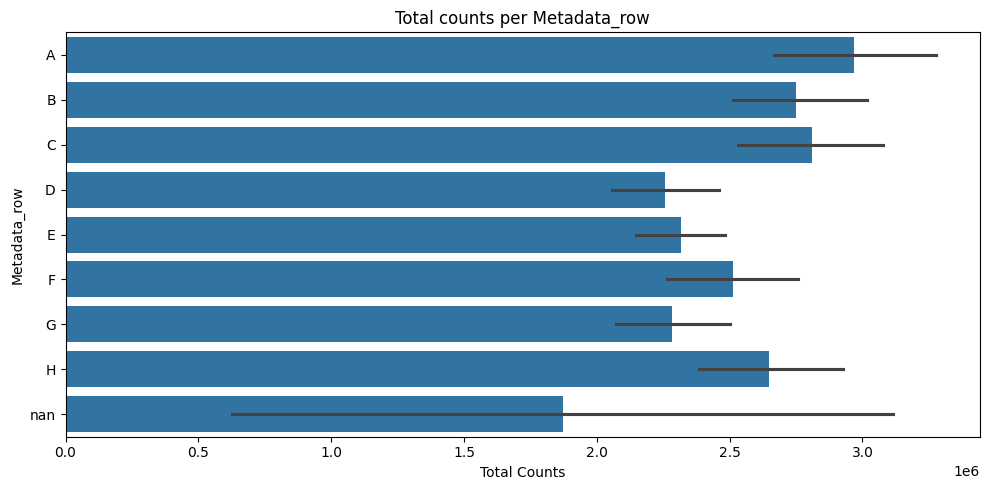

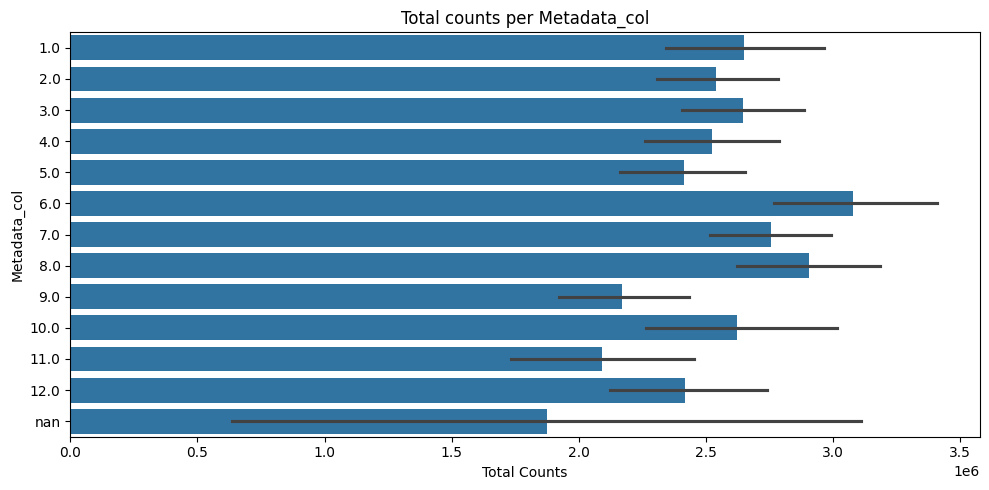

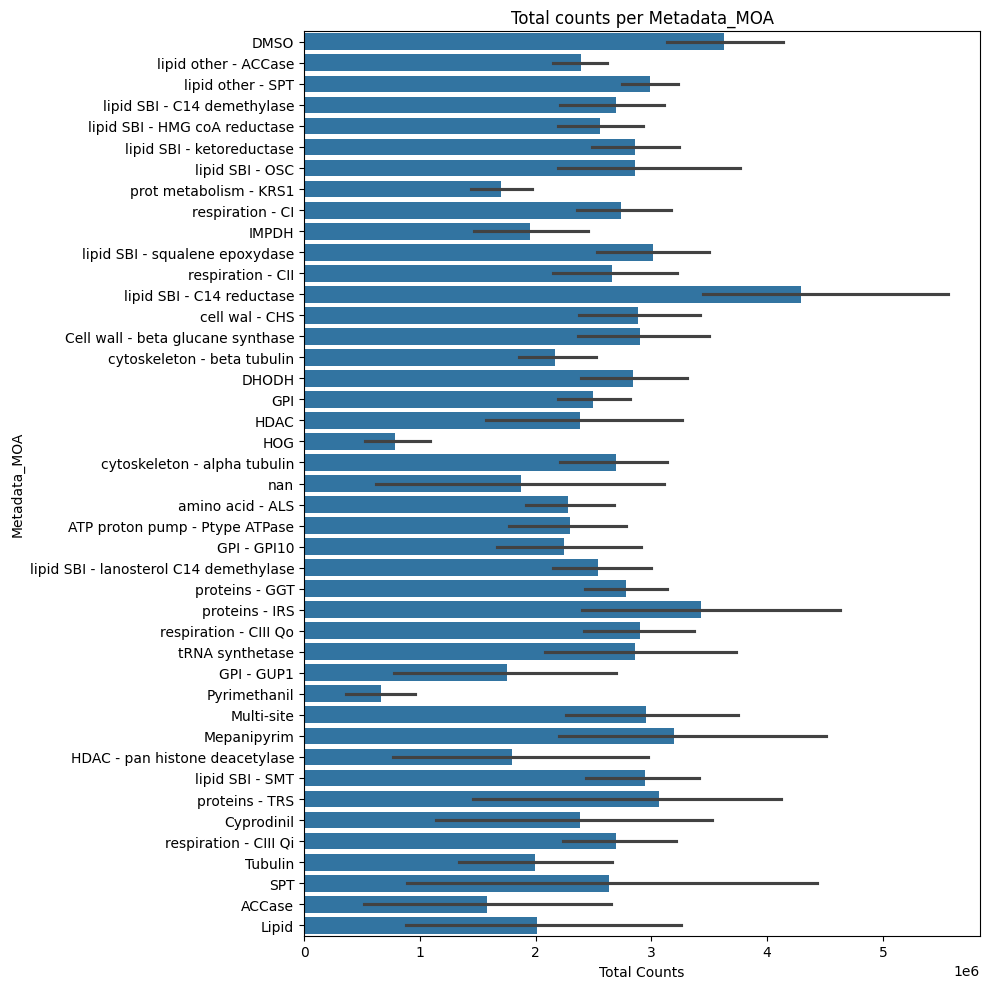

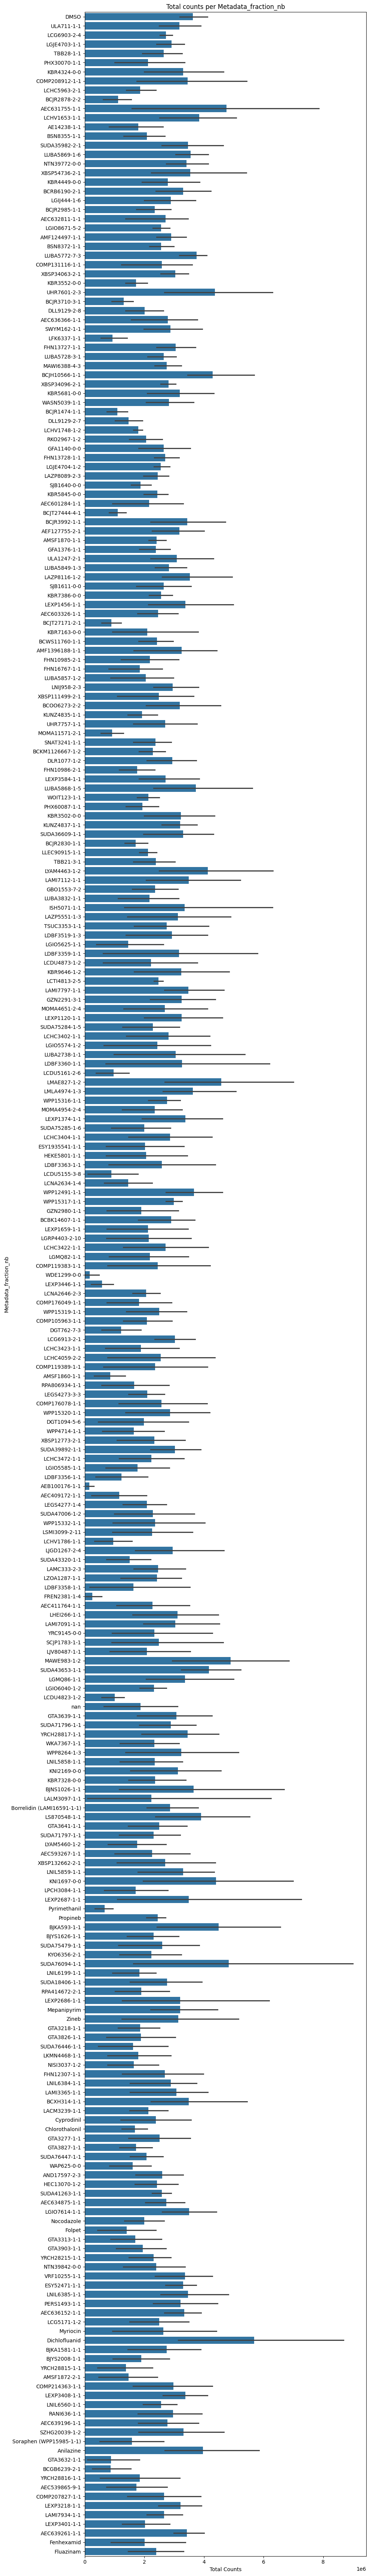

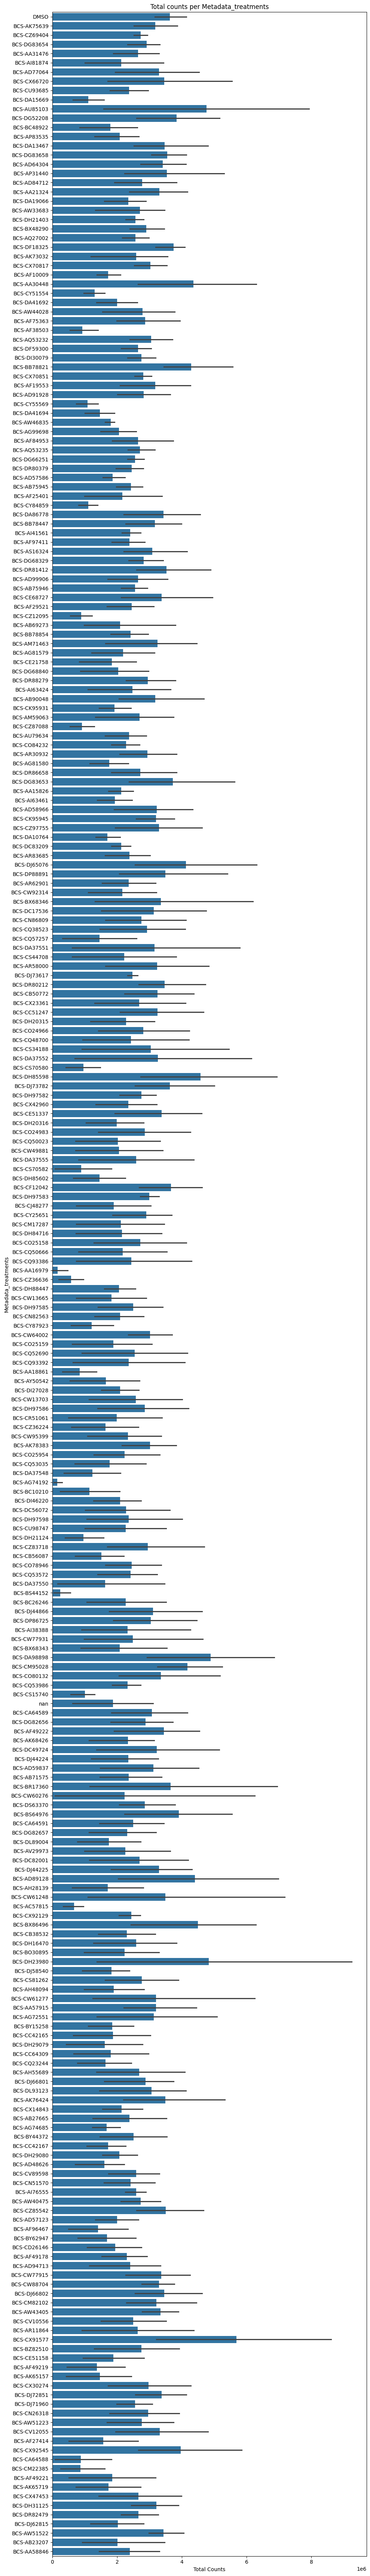

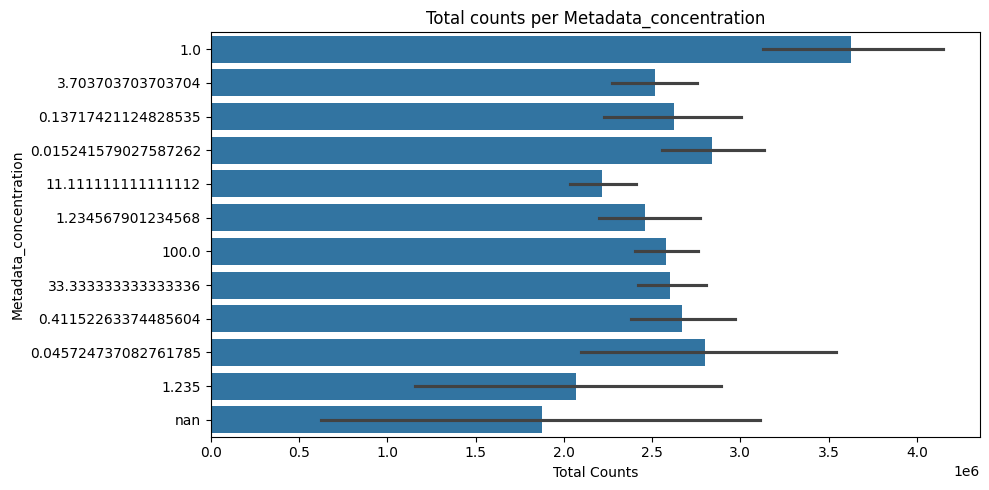

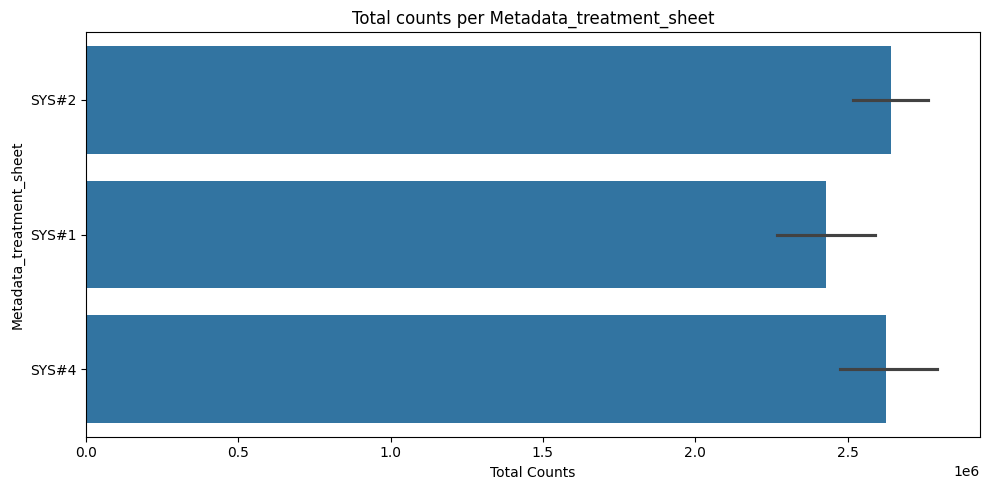

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming big_df_raw is already defined
gene_cols = [col for col in big_df_raw.columns if "Metadata" not in col]
meta_cols = [col for col in big_df_raw.columns if "Metadata" in col]

# Calculate total counts
big_df_raw["Metadata_total_counts"] = big_df_raw[gene_cols].sum(axis=1)

# Plotting
for col in meta_cols:
    big_df_raw[col] = big_df_raw[col].astype(str)  # Convert to string for plotting
    unique_count = big_df_raw[col].nunique()  # Get the number of unique values in the metadata column
    plt.figure(figsize=(10, max(5, int(unique_count * 0.25))))  # Set height based on unique count
    
    sns.barplot(x="Metadata_total_counts", y=col, data=big_df_raw)
    
    plt.title(f"Total counts per {col}")
    plt.xlabel("Total Counts")
    plt.ylabel(col)
    plt.tight_layout()  # Adjust layout to prevent clipping of titles/labels
    plt.show()

In [38]:
group = ['Metadata_MOA', 'Metadata_treatments', 'Metadata_concentration']
big_df_raw[group] = big_df_raw[group].astype(str)
summary_df = big_df_raw.groupby(group).size().reset_index(name='Count')